In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset

In [ ]:
dataset = pd.read_csv("city_day.csv")
dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
dataset = dataset.drop(columns=['City','Date'])
dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
dataset.isna().sum()/dataset.shape[0]

PM2.5         0.155701
PM10          0.377231
NO            0.121296
NO2           0.121398
NOx           0.141715
NH3           0.349734
CO            0.069723
SO2           0.130507
O3            0.136196
Benzene       0.190410
Toluene       0.272290
Xylene        0.613220
AQI           0.158511
AQI_Bucket    0.158511
dtype: float64

Drop all rows where target value, aka AQI index is null

In [ ]:
dataset = dataset[dataset['AQI'].isna()==False]
dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


Now calculating the null values

In [ ]:
dataset.isna().sum()/dataset.shape[0]

PM2.5         0.027284
PM10          0.285151
NO            0.015573
NO2           0.015734
NOx           0.074728
NH3           0.263018
CO            0.017907
SO2           0.024346
O3            0.032475
Benzene       0.142254
Toluene       0.234447
Xylene        0.618592
AQI           0.000000
AQI_Bucket    0.000000
dtype: float64

For columns having null values <10%, we drop those rows.

For other columns, we impute them with mean values.

In [ ]:
columns_to_remove_null_rows = [i for i in dataset.columns if dataset[i].isna().sum()/dataset.shape[0]<=0.1 and dataset[i].isna().sum()>0]

columns_to_impute = [i for i in dataset.columns if i not in columns_to_remove_null_rows and dataset[i].isna().sum()>0]

print("Columns in which rows will be removed:", columns_to_remove_null_rows)
print("Columns which will be imputed:", columns_to_impute)

Columns in which rows will be removed: ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
Columns which will be imputed: ['PM10', 'NH3', 'Benzene', 'Toluene', 'Xylene']


In [ ]:
from sklearn.impute import SimpleImputer

def remove_rows(data, column):
  return data[data[column].isna()==False]

for i in columns_to_remove_null_rows:
  dataset = remove_rows(dataset, i)

imputer = SimpleImputer()
dataset[columns_to_impute] = imputer.fit_transform(dataset[columns_to_impute])

dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,83.13,118.180852,6.93,28.71,33.72,24.96941,6.93,49.52,59.76,0.020000,0.000000,3.140000,209.0,Poor
29,79.84,118.180852,13.85,28.68,41.08,24.96941,13.85,48.49,97.07,0.040000,0.000000,4.810000,328.0,Very Poor
30,94.52,118.180852,24.39,32.66,52.61,24.96941,24.39,67.39,111.33,0.240000,0.010000,7.670000,514.0,Severe
31,135.99,118.180852,43.48,42.08,84.57,24.96941,43.48,75.23,102.70,0.400000,0.040000,25.870000,782.0,Severe
32,178.33,118.180852,54.56,35.31,72.80,24.96941,54.56,55.04,107.38,0.460000,0.060000,35.610000,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.940000,7.68,25.06,19.54,12.47000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
29527,24.38,74.090000,3.42,26.06,16.53,11.99000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
29528,22.91,65.730000,3.45,29.53,18.33,10.71000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory
29529,16.64,49.970000,4.05,29.26,18.80,10.03000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0,Satisfactory


Finally checking the null values

In [ ]:
dataset.isna().sum()/dataset.shape[0]

PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

Checking distribution of each column

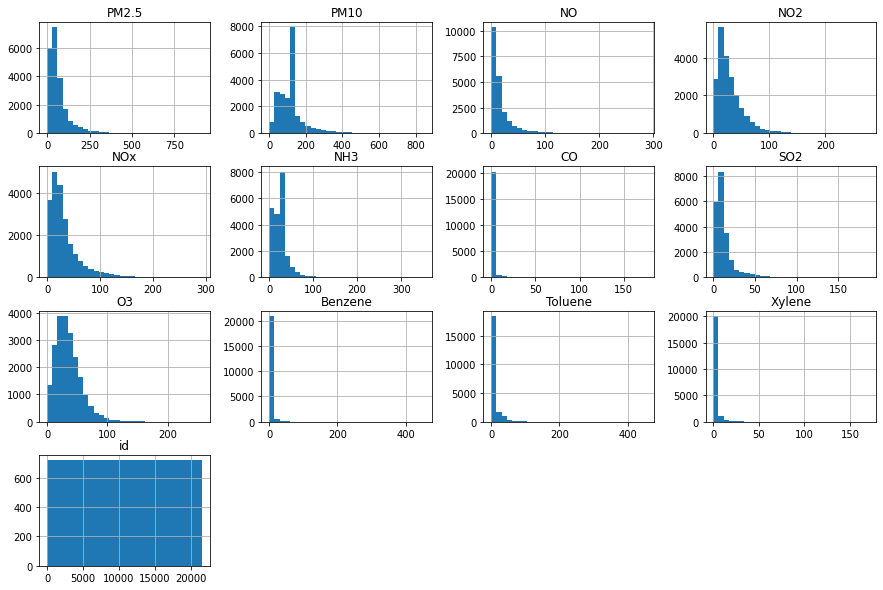

In [ ]:
dataset[[i for i in dataset.columns if i not in ["AQI_Bucket","AQI"]]].hist(bins=30, figsize=(15, 10))
plt.show()

Standard Scaling Trial

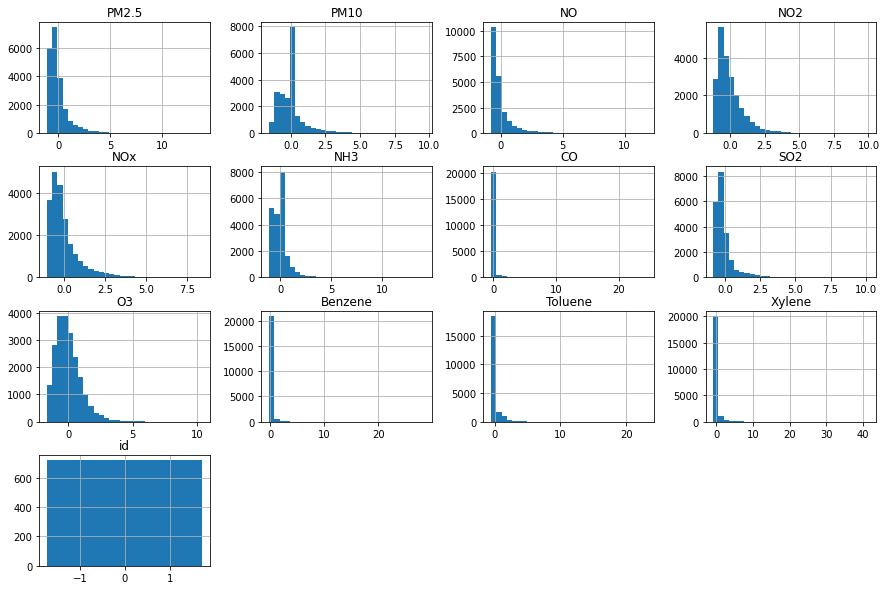

In [ ]:
from sklearn.preprocessing import StandardScaler

dataset_norm_test = dataset[[i for i in dataset.columns if i not in ["AQI_Bucket","AQI"]]].copy()
scaler = StandardScaler()
dataset_norm_test = pd.DataFrame(scaler.fit_transform(dataset_norm_test),columns=dataset_norm_test.columns)
dataset_norm_test.hist(bins=30, figsize=(15, 10))
plt.show()

Yeo Johnson Transformation trial

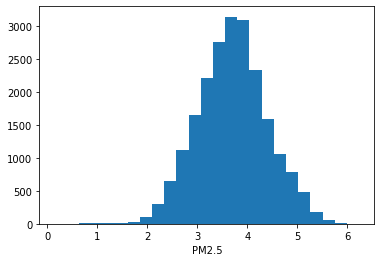

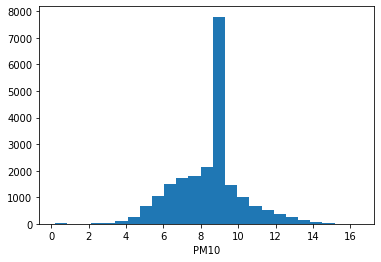

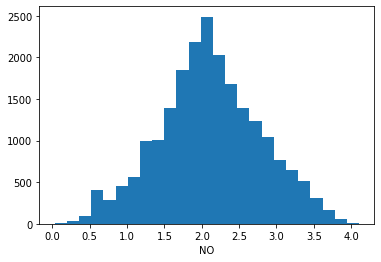

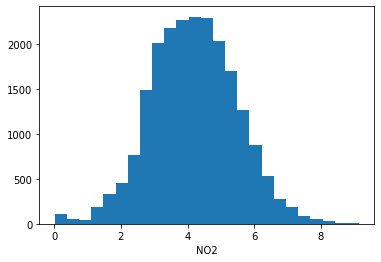

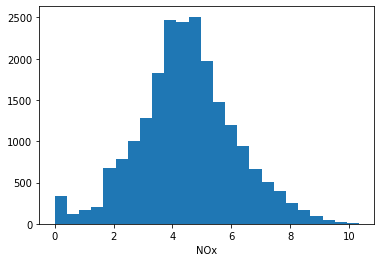

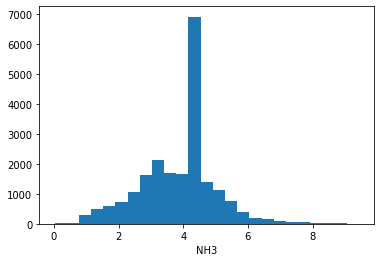

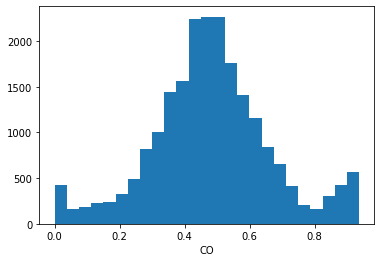

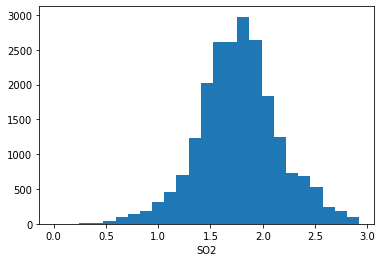

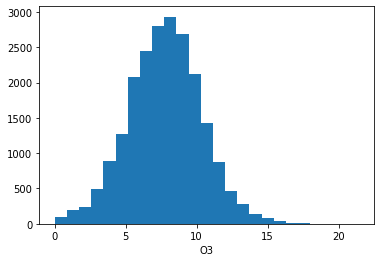

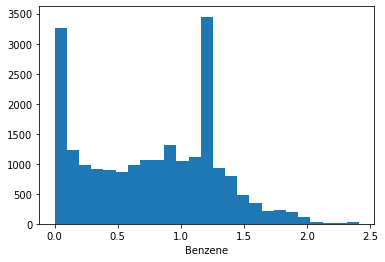

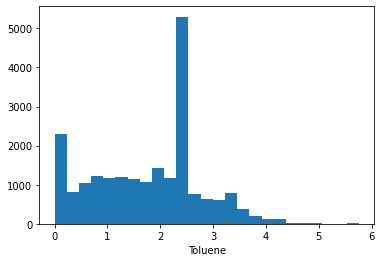

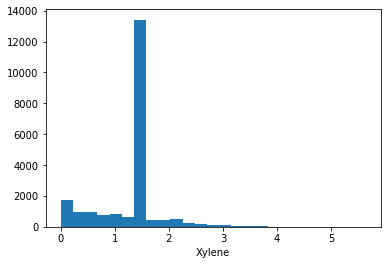

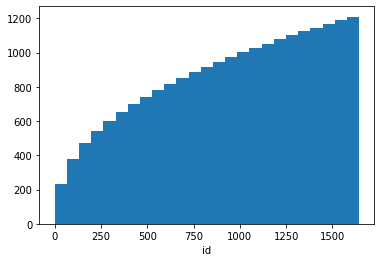

In [ ]:
import scipy.stats as stats

dataset_yeo_test = dataset[[i for i in dataset.columns if i not in ["AQI_Bucket","AQI"]]].copy()

for i in dataset_yeo_test.columns:
  yeo_t,param = stats.yeojohnson(dataset_yeo_test[i])
  plt.hist(yeo_t,bins=25)
  plt.xlabel(i)
  plt.show()

In [ ]:
columns_to_binarize = ['Benzene','Toluene','Xylene']
columns_to_yeo = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']

print('Columns to binarize:',columns_to_binarize)
print('Columns to yeo transform: ', columns_to_yeo)

Columns to binarize: ['Benzene', 'Toluene', 'Xylene']
Columns to yeo transform:  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']


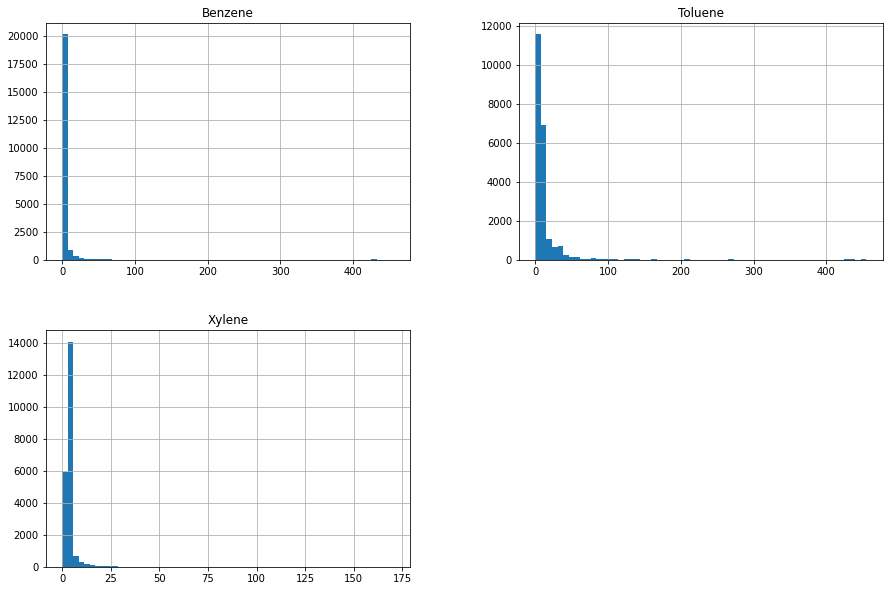

In [ ]:
dataset[columns_to_binarize].hist(bins=60, figsize=(15, 10))
plt.show()

Binarizing columns along with their custom thresholds

In [ ]:
binarize_threshold = {
    'Benzene' : 30,
    'Xylene' : 30,
    'Toluene' : 30,
}

def binarize(value, thresold):
  if value<=thresold:
    return 0
  return 1

for col in columns_to_binarize:
  new_col = col+"_binarized"
  dataset[new_col] = dataset[col].apply(lambda x: binarize(x, binarize_threshold[col]))

dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,id,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,83.13,118.180852,6.93,28.71,33.72,24.96941,6.93,49.52,59.76,0.020000,0.000000,3.140000,209.0,Poor,0,0,0,0
29,79.84,118.180852,13.85,28.68,41.08,24.96941,13.85,48.49,97.07,0.040000,0.000000,4.810000,328.0,Very Poor,1,0,0,0
30,94.52,118.180852,24.39,32.66,52.61,24.96941,24.39,67.39,111.33,0.240000,0.010000,7.670000,514.0,Severe,2,0,0,0
31,135.99,118.180852,43.48,42.08,84.57,24.96941,43.48,75.23,102.70,0.400000,0.040000,25.870000,782.0,Severe,3,0,0,0
32,178.33,118.180852,54.56,35.31,72.80,24.96941,54.56,55.04,107.38,0.460000,0.060000,35.610000,914.0,Severe,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.940000,7.68,25.06,19.54,12.47000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,21587,0,0,0
29527,24.38,74.090000,3.42,26.06,16.53,11.99000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,21588,0,0,0
29528,22.91,65.730000,3.45,29.53,18.33,10.71000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,21589,0,0,0
29529,16.64,49.970000,4.05,29.26,18.80,10.03000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0,Satisfactory,21590,0,0,0


Applying yeo-transform to the columns mentioned above

In [ ]:
yeo_transform_params = {}

for col in columns_to_yeo:
  yeo_t,param = stats.yeojohnson(dataset_yeo_test[col])
  yeo_transform_params[col] = param
  dataset[col] = yeo_t

dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,id,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,4.178385,8.818748,1.832736,4.509052,5.094131,4.204796,0.836386,2.501178,10.726404,0.020000,0.000000,3.140000,209.0,Poor,0,0,0,0
29,4.142958,8.818748,2.303657,4.507310,5.482637,4.204796,0.887014,2.493421,13.588157,0.040000,0.000000,4.810000,328.0,Very Poor,1,0,0,0
30,4.290898,8.818748,2.679013,4.726492,5.992967,4.204796,0.910212,2.610749,14.507537,0.240000,0.010000,7.670000,514.0,Severe,2,0,0,0
31,4.608320,8.818748,3.046326,5.169359,7.048522,4.204796,0.923763,2.648040,13.959982,0.400000,0.040000,25.870000,782.0,Severe,3,0,0,0
32,4.843410,8.818748,3.185308,4.860645,6.704120,4.204796,0.927264,2.539631,14.260111,0.460000,0.060000,35.610000,914.0,Severe,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2.672903,6.503510,1.902783,4.285362,4.103936,3.183687,0.316102,1.725250,6.596162,2.240000,12.070000,0.730000,41.0,Good,21587,0,0,0
29527,3.097321,7.475606,1.360780,4.349138,3.824223,3.130139,0.337917,1.922473,7.565131,0.740000,2.210000,0.380000,70.0,Satisfactory,21588,0,0,0
29528,3.042582,7.155131,1.366434,4.556107,3.995748,2.978652,0.320587,1.717434,7.672515,0.010000,0.010000,0.000000,68.0,Satisfactory,21589,0,0,0
29529,2.762194,6.456015,1.471310,4.540732,4.038403,2.892361,0.337917,1.796257,7.317953,0.000000,0.000000,0.000000,54.0,Satisfactory,21590,0,0,0


In [ ]:
yeo_transform_params

{'CO': -1.0633958776243513,
 'NH3': 0.15070997294840976,
 'NO': -0.1203892296507965,
 'NO2': 0.16068251821046106,
 'NOx': 0.19306461216459575,
 'O3': 0.41101531529167773,
 'PM10': 0.23448117542164032,
 'PM2.5': -0.026893075959141775,
 'SO2': -0.249627316956199}

Testing for correlation

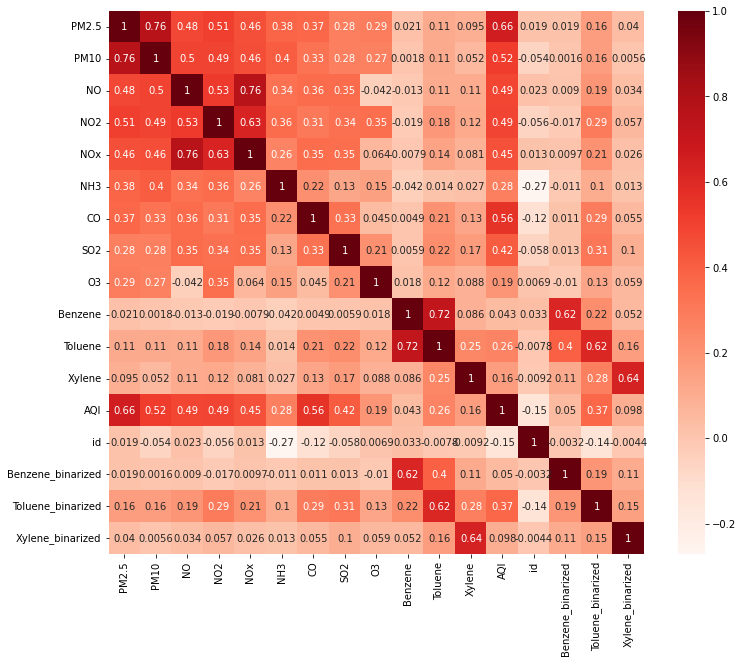

In [ ]:
import seaborn as sns

dataset_corr = dataset[[i for i in dataset.columns if i!="AQI_Bucket"]]

plt.figure(figsize=(12,10))
cor = dataset_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Removing highly correlated values

In [ ]:
dataset.drop(columns = columns_to_binarize+['NOx'],inplace=True)

## Modelling Phase

## Predicting the AQI value

In [ ]:
dataset['AQI'] = np.log(dataset['AQI'])
dataset

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,id,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,4.178385,8.818748,1.832736,4.509052,4.204796,0.836386,2.501178,10.726404,5.342334,Poor,0,0,0,0
29,4.142958,8.818748,2.303657,4.507310,4.204796,0.887014,2.493421,13.588157,5.793014,Very Poor,1,0,0,0
30,4.290898,8.818748,2.679013,4.726492,4.204796,0.910212,2.610749,14.507537,6.242223,Severe,2,0,0,0
31,4.608320,8.818748,3.046326,5.169359,4.204796,0.923763,2.648040,13.959982,6.661855,Severe,3,0,0,0
32,4.843410,8.818748,3.185308,4.860645,4.204796,0.927264,2.539631,14.260111,6.817831,Severe,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2.672903,6.503510,1.902783,4.285362,3.183687,0.316102,1.725250,6.596162,3.713572,Good,21587,0,0,0
29527,3.097321,7.475606,1.360780,4.349138,3.130139,0.337917,1.922473,7.565131,4.248495,Satisfactory,21588,0,0,0
29528,3.042582,7.155131,1.366434,4.556107,2.978652,0.320587,1.717434,7.672515,4.219508,Satisfactory,21589,0,0,0
29529,2.762194,6.456015,1.471310,4.540732,2.892361,0.337917,1.796257,7.317953,3.988984,Satisfactory,21590,0,0,0


Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset[[i for i in dataset.columns if i not in ["AQI","AQI_Bucket"]]], 
    dataset["AQI"], 
    test_size=0.2, 
    random_state=100
    )

X_train

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,id,Benzene_binarized,Toluene_binarized,Xylene_binarized
4215,3.021601,6.480093,2.454278,3.012698,3.141431,0.384683,1.569540,6.416450,2675,0,0,0
20234,5.106237,8.818748,2.186074,2.827803,4.204796,0.635040,1.718645,7.399535,15287,0,0,0
16997,3.743003,8.927164,2.010235,3.582647,2.460866,0.292701,1.792167,5.879300,13380,0,0,0
104,4.298734,8.818748,2.479503,4.359783,4.204796,0.899340,1.954206,8.943845,68,0,0,0
5507,3.516771,8.818748,1.379462,4.057023,4.204796,0.467825,1.499185,8.775373,3724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21598,4.348043,8.818748,2.572561,5.291257,5.106169,0.564720,1.462475,7.082736,16304,0,0,0
118,4.623721,8.818748,1.618373,3.652042,4.204796,0.801711,2.658978,7.162994,79,0,0,0
15623,3.918382,8.761691,2.001069,5.174876,3.537826,0.381057,2.270775,11.720631,12119,0,0,0
18941,3.413480,6.608296,3.309343,0.896178,1.513751,0.451511,2.055211,1.005454,14147,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

X_train

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,id,Benzene_binarized,Toluene_binarized,Xylene_binarized
0,-0.987730,-1.079136,0.513935,-0.911308,-0.591963,-0.528226,-0.527961,-0.528941,-1.308224,-0.091044,-0.270784,-0.055478
1,2.018265,0.227184,0.121795,-1.055474,0.312066,0.838722,-0.139739,-0.147103,0.718660,-0.091044,-0.270784,-0.055478
2,0.052515,0.287743,-0.135299,-0.466910,-1.170553,-1.030446,0.051689,-0.737574,0.412185,-0.091044,-0.270784,-0.055478
3,0.853865,0.227184,0.550815,0.139035,0.312066,2.281801,0.473587,0.452719,-1.727196,-0.091044,-0.270784,-0.055478
4,-0.273706,0.227184,-1.057552,-0.097031,0.312066,-0.074268,-0.711143,0.387283,-1.139638,-0.091044,-0.270784,-0.055478
...,...,...,...,...,...,...,...,...,...,...,...,...
17268,0.924968,0.227184,0.686877,0.865321,1.078378,0.454775,-0.806723,-0.270150,0.882103,-0.091044,-0.270784,-0.055478
17269,1.322488,0.227184,-0.708241,-0.412801,0.312066,1.748747,2.308590,-0.238977,-1.725429,-0.091044,-0.270784,-0.055478
17270,0.305406,0.195314,-0.148702,0.774577,-0.254964,-0.548024,1.297832,1.531244,0.209529,-0.091044,-0.270784,-0.055478
17271,-0.422649,-1.007525,1.764123,-2.561593,-1.975752,-0.163345,0.736572,-2.630613,0.535450,-0.091044,-0.270784,-0.055478


Fitting the model with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model_lr.predict(X_train)

print('train mse: {}'.format(
    mean_squared_error((y_train), (pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (pred))))
print()

# make predictions for test set
pred = model_lr.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error((y_test), (pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (pred))))

train mse: 0.08160195893731888
train rmse: 0.2856605659472775
train r2: 0.8176628312441719

test mse: 0.08681634870905088
test rmse: 0.2946461415139368
test r2: 0.80849843120208


Fitting the model with Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_train)

print('train mse: {}'.format(
    mean_squared_error((y_train), (pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (pred))))
print()

# make predictions for test set
pred = model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error((y_test), (pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (pred))))

train mse: 0.10523205733582908
train rmse: 0.3243949095405615
train r2: 0.7648620738173119

test mse: 0.10982170617510623
test rmse: 0.33139358197633556
test r2: 0.7577526660205589


Fitting the model with Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 1)
model.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_train)

print('train mse: {}'.format(
    mean_squared_error((y_train), (pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (pred))))
print()

# make predictions for test set
pred = model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error((y_test), (pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (pred))))

train mse: 0.08160195994844788
train rmse: 0.285660567717086
train r2: 0.817662828984834

test mse: 0.08681602601884182
test rmse: 0.2946455939240257
test r2: 0.8084991429998253


Since Multiple Linear Regression gives us the best value, we will use that as our primary model.

Saving the model for offline use

In [ ]:
import joblib

joblib_file = "joblib_RL_Model.pkl"  
joblib.dump(model_lr, joblib_file)

['joblib_RL_Model.pkl']

In [ ]:
joblib_file_scaler = "scaler.pkl"
joblib.dump(scaler, joblib_file_scaler)

['scaler.pkl']